In [1]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Literal

In [2]:
class QuadState(TypedDict):

    a:int 
    b:int
    c:int 

    d:float 
    equation:str 
    result: str 

In [22]:
def display_equation(state:QuadState):

    return {"equation": f"{state['a']}x2 + ({state['b']}x) + ({state['c']})"}

In [23]:
def calculate_discriminant(state:QuadState):

    d = state['b']**2 - 4*state['a']*state['c']

    return {'d':d}

In [33]:
def real_roots(state:QuadState):

    root1 = (-state["b"] + state["d"]**0.5)/(2*state["a"])
    root2 = (-state["b"] - state["d"]**0.5)/(2*state["a"])

    return {"result": f"The roots are {root1} and {root2}"}

In [34]:
def repeated_roots(state:QuadState):

    root = (-state["b"])/(2*state["a"])

    result = f'Only repeating root is {root}'

    return {'result':result}

In [35]:
def no_real_roots(state: QuadState):

    result = f'No real roots'

    return {'result': result}

In [36]:
def check_d(state:QuadState)-> Literal["real_roots", "repeated_roots", "no_real_roots"]:

    if state['d'] > 0:
        return "real_roots"
    elif state['d'] == 0:
        return "repeated_roots"
    else:
        return "no_real_roots"
    

In [37]:
graph = StateGraph(QuadState)

graph.add_node("display_equation", display_equation)
graph.add_node("calculate_discriminant", calculate_discriminant)
graph.add_node('real_roots', real_roots)
graph.add_node('repeated_roots', repeated_roots)
graph.add_node('no_real_roots', no_real_roots)


graph.add_edge(START, "display_equation")
graph.add_edge("display_equation", "calculate_discriminant")

graph.add_conditional_edges("calculate_discriminant", check_d )

graph.add_edge('real_roots', END)
graph.add_edge('repeated_roots', END)
graph.add_edge('no_real_roots', END)

workflow = graph.compile()



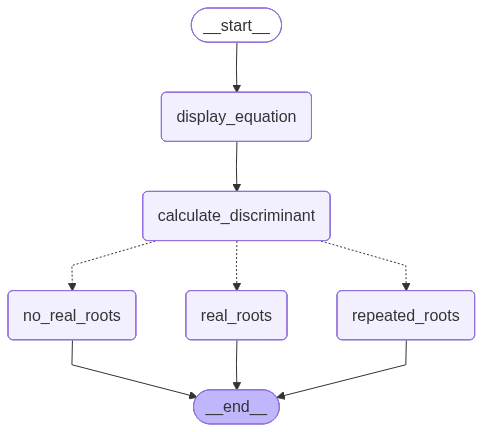

In [38]:
workflow

In [39]:
initial_state = {
    'a': 2, 
    'b': -4,
    'c': -2
}

workflow.invoke(initial_state)


{'a': 2,
 'b': -4,
 'c': -2,
 'd': 32,
 'equation': '2x2 + (-4x) + (-2)',
 'result': 'The roots are 2.414213562373095 and -0.41421356237309515'}